In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [329]:
import os


folder_path = 'reports/test_2023-06-11'
nu_of_seconds = 300
location_name = "sandoya"
consider_wind = True

wind_direction = "north"

# Get all the file names in the folder
file_names = sorted(os.listdir(folder_path))

file_names = [i for i in file_names if str(nu_of_seconds) and location_name in i]

if consider_wind:
    file_names = [i for i in file_names if str(nu_of_seconds) and wind_direction in i]


#file_names.remove('result_dict_tautra_start_end_300sec_300sec.pkl')
if location_name in ["tautra", "sekken"]:
    file_names.remove('result_dict_tautrasekken_1_300sec_300sec.pkl')
elif location_name == "sandoya":
    #file_names.remove('result_dict_sandoya_start_end_300sec_300sec.pkl')
    file_names.reverse()
    
loaded_result_dicts = []
for file_name in file_names:
    with open(folder_path+'/'+file_name, 'rb') as f:
        loaded_result_dicts.append(pickle.load(f))


In [330]:
file_names

['result_dict_sandoya_west_1_300sec_300sec_north.pkl',
 'result_dict_sandoya_east_1_300sec_300sec_north.pkl']

In [292]:
loaded_result_dicts[1]

{'route': 'tautra_north_2',
 'duration_of_failure_seconds': 300,
 'duration_of_failure_simulation_seconds': 300,
 'fuel_consumption_kgs': 140.88044685954378,
 'time_usage_seconds': 1053.0,
 'nu_of_crashes': 0,
 'nu_of_safety_margin_violation': 0,
 'total_consequence_level': 0,
 'total_risk': 0,
 'total_consequences': {'envConsequence': 0,
  'socialConsequence': 0,
  'economicConsequence': 0},
 'total_damage_states': [0, 0, 0, 0, 0, 0],
 'consequence_dicts': [{'failure_mode': 'FM1: Full Blackout',
   'starting_time': 0.0,
   'worst_violation': '',
   'total_consequence': 0,
   'risk': 0,
   'probability': 0,
   'consequences': {'envConsequence': 0,
    'socialConsequence': 0,
    'economicConsequence': 0},
   'damage_state': [0, 0, 0, 0, 0, 0],
   'ending_time': 300.0},
  {'failure_mode': 'FM1: Full Blackout',
   'starting_time': 4.0,
   'worst_violation': '',
   'total_consequence': 0,
   'risk': 0,
   'probability': 0,
   'consequences': {'envConsequence': 0,
    'socialConsequence': 

In [248]:
leastTimeGrounding = 10000
path = ""
start_time = 0

for resu_dict in loaded_result_dicts:
    for element in resu_dict['consequence_dicts']:
        if element['ending_time'] - element['starting_time'] < leastTimeGrounding:
            leastTimeGrounding = element['ending_time'] - element['starting_time']
            path = resu_dict["route"]
            start_time = element['starting_time']
            
            

print(leastTimeGrounding)
print(path)
print(start_time)

125.0
tautra_north_3
696.0


In [246]:
alpha_env = 1
alpha_soc = 1
alpha_eco = 1

#RISK IS NOT UPDATED!!

probability = 1.4*10**(-8)

for _dict in loaded_result_dicts:
    if _dict['consequence_dicts'][0]['probability'] != -1: #TO MAKE SURE IT CAN ONLY BE RAN ONE TIME
        _dict['total_consequences']['envConsequence'] = _dict['total_consequences']['envConsequence']*alpha_env
        _dict['total_consequences']['socialConsequence'] = _dict['total_consequences']['socialConsequence']*alpha_soc
        _dict['total_consequences']['economicConsequence'] = _dict['total_consequences']['economicConsequence']*alpha_eco
        
        _dict['total_risk'] = (_dict['total_consequences']['envConsequence']+_dict['total_consequences']['socialConsequence']+_dict['total_consequences']['economicConsequence'])*probability
        
        _dict['consequence_dicts'][0]['probability'] = -1
    
loaded_result_dicts[4]
    
    
    
    

{'route': 'tautra_south_2',
 'duration_of_failure_seconds': 300,
 'duration_of_failure_simulation_seconds': 300,
 'fuel_consumption_kgs': 138.58279623109598,
 'time_usage_seconds': 1125.5,
 'nu_of_crashes': 12,
 'nu_of_safety_margin_violation': 4,
 'total_consequence_level': 3428725.0,
 'total_risk': 0.04800215,
 'total_consequences': {'envConsequence': 378000.0,
  'socialConsequence': 1584300.0,
  'economicConsequence': 1466425.0},
 'total_damage_states': [3.54,
  3.6499999999999995,
  2.46,
  0.3500000000000001,
  0.11999999999999998,
  1.88],
 'consequence_dicts': [{'failure_mode': 'FM1: Full Blackout',
   'starting_time': 0.0,
   'worst_violation': '',
   'total_consequence': 0,
   'risk': 0,
   'probability': -1,
   'consequences': {'envConsequence': 0,
    'socialConsequence': 0,
    'economicConsequence': 0},
   'damage_state': [0, 0, 0, 0, 0, 0],
   'ending_time': 300.0},
  {'failure_mode': 'FM1: Full Blackout',
   'starting_time': 4.0,
   'worst_violation': '',
   'total_conse

In [259]:
# len(loaded_result_dicts)
k = 3
[round(loaded_result_dicts[k]['total_damage_states'][i]/loaded_result_dicts[k]['nu_of_crashes']*100,1) for i in range(6)]

[29.0, 30.0, 21.0, 3.0, 1.0, 16.0]

{'north1': [648600, 2967000, 2382972], 'north2': [0, 0, 0], 'north3': [0, 0, 0], 'south1': [2040300, 3785100, 3282932], 'south2': [0, 0, 0], 'south3': [374400, 1581000, 1446140]}
idx:  0 , consequence:  Environmental  values:  [648600, 0, 0, 2040300, 0, 374400]
idx:  1 , consequence:  Social  values:  [2967000, 0, 0, 3785100, 0, 1581000]
idx:  2 , consequence:  Economic  values:  [2382972, 0, 0, 3282932, 0, 1446140]
['Environmental', 'Social', 'Economic']


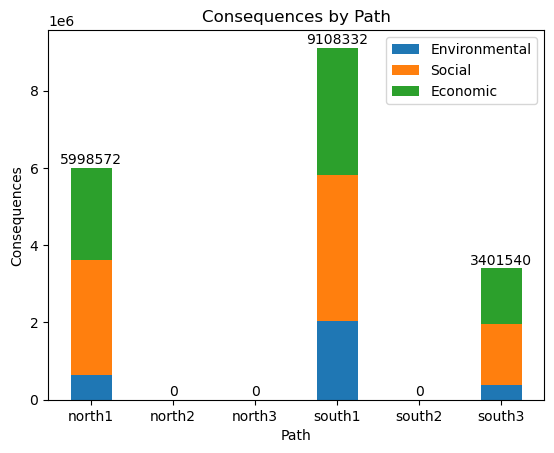

In [293]:
consequences = {}
typeOfConsequences = ['envConsequence', 'socialConsequence', 'economicConsequence']

#for res_dict in loaded_result_dicts:
#    consequences[res_dict['route']] = [
#        round(res_dict['total_consequences'][i] / res_dict['nu_of_crashes'] * 100, 1) 
#        if res_dict['nu_of_crashes'] != 0 else 0 
#        for i in typeOfConsequences
#    ] 
    
for res_dict in loaded_result_dicts:
    name_parts = res_dict['route'].split("_")
    route = "".join(name_parts[1:])
    consequences[route] = [
        int(res_dict['total_consequences'][i])
        for i in typeOfConsequences
    ] 
print(consequences)

typeOfConsequences = ['Environmental', 'Social', 'Economic']

routes = list(consequences.keys())
n_routes = len(routes)

# Set up the figure and axis
fig, ax = plt.subplots()

# Width of the bars
bar_width = 0.5

# Position of the bars
indices = np.arange(n_routes)

bars = []
for idx, consequence in enumerate(typeOfConsequences):
    values = [consequences[route][idx] for route in routes]
    print("idx: ",idx, ", consequence: ", consequence, " values: ", values)
    if idx == 0:
        bar = ax.bar(indices, values, bar_width, label=consequence)
    else:
        bottom_values = [sum(consequences[route][:idx]) for route in routes]
        bar = ax.bar(indices, values, bar_width, label=consequence, bottom=bottom_values)
    bars.append(bar)

# Calculate the maximum value of the bars
max_value = max([bar.get_height() for bar in bars[-1]])

print(typeOfConsequences)

# Add total values for each route
for idx, route in enumerate(routes):
    total_value = sum(consequences[route])
    ax.text(idx, total_value + max_value * 0.005, f'{round(total_value, 1)}', ha='center', va='bottom')

# Remove individual consequence values text
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, '', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Path')
ax.set_ylabel('Consequences')
ax.set_title('Consequences by Path')
ax.set_xticks(indices)
ax.set_xticklabels(routes)
ax.legend()

plt.savefig("reports/jupyter/consequences.png")

# Display the plot
plt.show()


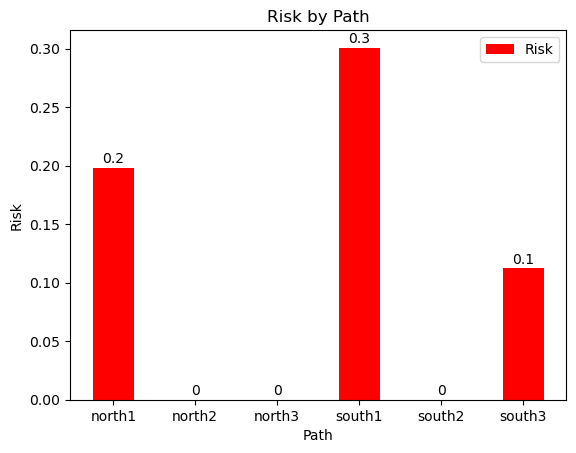

In [294]:
import numpy as np
import matplotlib.pyplot as plt

risks = []
routes = []

for res_dict in loaded_result_dicts:
    name_parts = res_dict['route'].split("_")
    routes.append("".join(name_parts[1:]))
    risks.append(res_dict['total_risk'])

#routes = [res_dict['route'] for res_dict in loaded_result_dicts]
n_routes = len(routes)

# Set up the figure and axis
fig, ax = plt.subplots()

# Width of the bars
bar_width = 0.5

# Position of the bars
indices = np.arange(n_routes)

# Plot the risk values
bars = ax.bar(indices, risks, bar_width, color='red', label='Risk')

# Add risk values above the bars
for idx, risk in enumerate(risks):
    ax.text(idx, risk + max(risks) * 0.005, f'{round(risk, 1)}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Path')
ax.set_ylabel('Risk')
ax.set_title('Risk by Path')
ax.set_xticks(indices)
ax.set_xticklabels(routes)
ax.legend()

# Save the plot
plt.savefig("reports/jupyter/risk.png")

# Display the plot
plt.show()


In [201]:
# Make Consequences Diagram

damage_states = []

for dict in loaded_result_dicts:
    damage_states = damage_states.append([round(dict['total_damage_states'][i]/dict['nu_of_crashes']*100,1) for i in range(6)])
    
    
print(damage_states)
[round(loaded_result_dicts[k]['total_damage_states'][i]/loaded_result_dicts[k]['nu_of_crashes']*100,1) for i in range(6)]

ZeroDivisionError: division by zero

In [202]:
48924738.2578499* 10

489247382.578499

In [76]:
len(loaded_result_dicts)/2

3.0

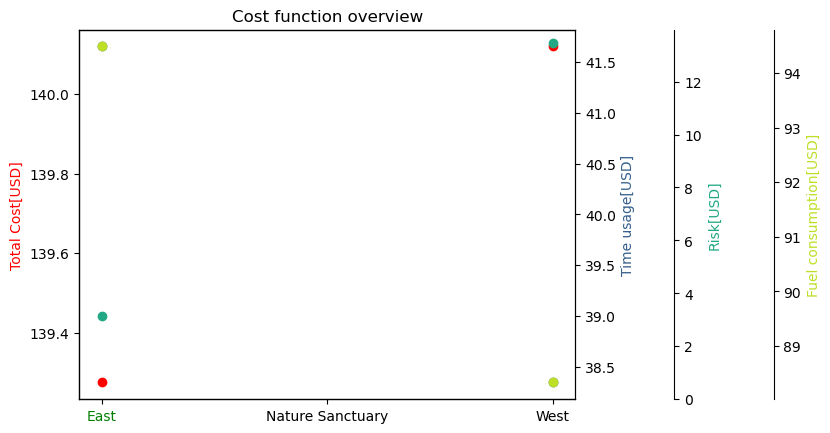

In [326]:
fuel_consumptions = []
times = []
risks = []
total_costs = []
nu_of_paths = len(loaded_result_dicts)
center_number = int(nu_of_paths/2)



cost_grounding = 1000000 #USD PR GROUDING
probability_of_full_blackout_per_second = 1.3 * 10**(-8)
consequence_of_grounding = 3 #SHOULD NOT BE HARDCODED
time_interval = 4 #SHOULD NOT BE HARDCODED
cost_consequence = cost_grounding*probability_of_full_blackout_per_second*time_interval/consequence_of_grounding
operating_cost_per_day = 5400 #USD
cost_time = operating_cost_per_day/24/60/60 #USD PR SECOND
cost_fuel = 1 #USD PR LITER 

alpha_risk = 1
alpha_time = 1
alpha_fuel = 3



for result_dict in loaded_result_dicts:
    fuel = result_dict['fuel_consumption_kgs']*cost_fuel * alpha_fuel
    time = result_dict['time_usage_seconds']*cost_time * alpha_time
    risk = result_dict['total_risk'] * alpha_risk
    total_cost = fuel+time+risk
    
    fuel_consumptions.append(fuel)
    times.append(time)
    risks.append(risk)
    
    #COST FUNCTION
    total_costs.append(total_cost)


if location_name in ["tautra","sandoya"]:
    fuel_consumptions.insert(center_number, np.nan)
    times.insert(center_number, np.nan)
    risks.insert(center_number, np.nan)
    total_costs.insert(center_number, np.nan)
elif location_name == "sekken":
    fuel_consumptions.insert(1, np.nan)
    times.insert(1, np.nan)
    risks.insert(1, np.nan)
    total_costs.insert(1, np.nan)

index_best_route = total_costs.index(min(total_costs))


x = []

for i in range(1, nu_of_paths+1+1):
    x.append(i)
    
    
color1, color2, color3, color4 = plt.cm.viridis([0, .3, .6, .9])
color1 = "red"

fig, ax1 = plt.subplots()
ax1.plot(x, total_costs, 'o', color=color1);
ax1.plot(x, total_costs, color=color1, label='Total Cost[USD]', linewidth=3)
ax1.set_ylabel('Total Cost[USD]', color=color1)

# Create a second y-axis for y2
ax2 = ax1.twinx()
ax2.plot(x, times, 'o', color=color2);
ax2.plot(x, times, color=color2, label='Time usage[USD]')
ax2.set_ylabel('Time usage[USD]', color=color2)

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.2))
ax3.plot(x, risks, 'o', color=color3);
ax3.plot(x, risks, color=color3, label='Risk[USD]')
ax3.set_ylabel('Risk[USD]', color=color3)
ax3.set_ylim(bottom=0)

ax4 = ax1.twinx()
ax4.spines.right.set_position(("axes", 1.4))
ax4.plot(x, fuel_consumptions, 'o', color=color4);
ax4.plot(x, fuel_consumptions, color=color4, label='Fuel consumption[USD]')
ax4.set_ylabel('Fuel consumption[USD]', color=color4)


# Add a title and axis labels
plt.title('Cost function overview')
if location_name == "tautra":
    plt.xticks([1, 2, 3, 4, 5, 6, 7], ['North1', 'North2', 'North3','Tautra Island', 'South1', 'South2','South3'])
elif location_name == "sekken":
    plt.xticks([1, 2, 3, 4 ,5], ['North1','Sekken', 'South1', 'South2', 'South3'])
elif location_name == "sandoya":
    plt.xticks([1, 2, 3], ['East','Nature Sanctuary', 'West'])
 
    
    
ax1.get_xticklabels()[index_best_route].set_color('green')

#plt.legend()

# Show the plot
plt.show()

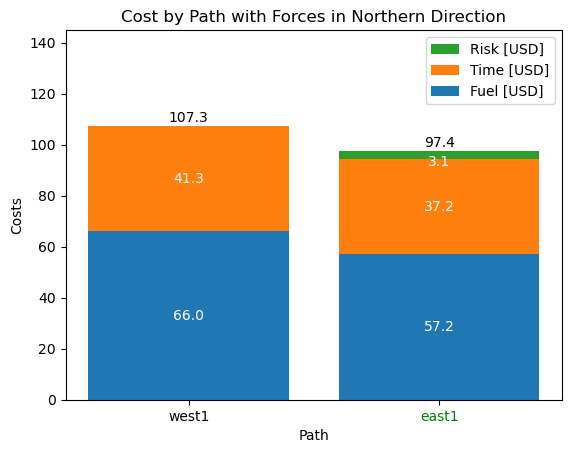

In [331]:
import numpy as np
import matplotlib.pyplot as plt

fuel_consumptions = []
times = []
risks = []
total_costs = []
nu_of_paths = len(loaded_result_dicts)
center_number = int(nu_of_paths/2)
costs = {}

cost_grounding = 1000000 #USD PR GROUDING
probability_of_full_blackout_per_second = 1.3 * 10**(-8)
consequence_of_grounding = 3 #SHOULD NOT BE HARDCODED
time_interval = 4 #SHOULD NOT BE HARDCODED
cost_consequence = cost_grounding*probability_of_full_blackout_per_second*time_interval/consequence_of_grounding
operating_cost_per_day = 5400 #USD
cost_time = operating_cost_per_day/24/60/60 #USD PR SECOND
cost_fuel = 1 #USD PR LITER 

alpha_risk = 1
alpha_time = 1
alpha_fuel = 3

for result_dict in loaded_result_dicts:    
    name_parts = result_dict['route'].split("_")
    route = "".join(name_parts[1:])
    total_costs.append(result_dict['fuel_consumption_kgs']*cost_fuel * alpha_fuel + result_dict['time_usage_seconds']*cost_time * alpha_time + result_dict['total_risk'] * alpha_risk)
    costs[route] = [
        result_dict['fuel_consumption_kgs']*cost_fuel * alpha_fuel, result_dict['time_usage_seconds']*cost_time * alpha_time, result_dict['total_risk'] * alpha_risk
    ]

index_best_route = total_costs.index(min(total_costs))
typeOfCosts = ["Fuel [USD]", "Time [USD]", "Risk [USD]"]
routes = list(costs.keys())
n_routes = len(routes)

# Set up the figure and axis
fig, ax = plt.subplots()

# Width of the bars
bar_width = 0.8

# Position of the bars
indices = np.arange(len(routes))

bars = []

minValueToShowInCenter = 2 if "tautra" in loaded_result_dicts[0]["route"] or "sekken" in loaded_result_dicts[0]["route"] else 8

minValueToShowInCenter = 15

for idx, cost in enumerate(typeOfCosts):
    values = [costs[route][idx] for route in routes]
    if idx == 0:
        bar = ax.bar(indices, values, bar_width,label=cost)
    else:
        bottom_values = [sum(costs[route][:idx]) for route in routes]
        bar = ax.bar(indices, values, bar_width,label=cost, bottom=bottom_values)
    bars.append(bar)

    # Add individual values for each section of the bars
    for i, value in enumerate(values):
        if 0 < value < minValueToShowInCenter:
            ax.text(i, sum(costs[routes[i]][:idx+1]) - value/2, f'{round(value, 1)}', ha='center', va='top', color='white')
        elif value > minValueToShowInCenter:
            ax.text(i, sum(costs[routes[i]][:idx+1]) - value/2, f'{round(value, 1)}', ha='center', va='center', color='white')


# Calculate the maximum value of the bars
max_value = max(total_costs)

# Add total values for each route
for idx, route in enumerate(routes):
    total_value = sum(costs[route])
    ax.text(idx, total_value + max_value * 0.005, f'{round(total_value, 1)}', ha='center', va='bottom')
    
    
# Add labels, title, and legend
ax.set_ylim(0, max_value * 1.35)  # Increase the upper limit by 20%
ax.set_xlabel('Path')
ax.set_ylabel('Costs')
ax.set_title('Cost by Path around Tautra')
ax.set_title('Cost by Path with Forces in Northern Direction')
#ax.set_title('Cost by Path around Sekken')
ax.set_xticks(indices)
ax.set_xticklabels(routes)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1]) 

ax.get_xticklabels()[index_best_route].set_color('green')


# Display the plot
plt.show()

In [119]:
import math

lambda_bo = 0.1
L_segment = 20
v_vessel = 20

P = 1- math.exp(-lambda_bo*(L_segment/v_vessel))
print(P)

0.09516258196404048


In [120]:
# COST FUNCTION

#IN USD

nu_of_paths = len(loaded_result_dicts)
center_number = int(nu_of_paths/2)

total_costs = []

cost_grounding = 1000000 #USD PR GROUDING
probability_of_full_blackout_per_second = 1.3 * 10**(-8)
consequence_of_grounding = 3 #SHOULD NOT BE HARDCODED
time_interval = 4 #SHOULD NOT BE HARDCODED
cost_consequence = cost_grounding*probability_of_full_blackout_per_second*time_interval/consequence_of_grounding

operating_cost_per_day = 5400 #USD
cost_time = operating_cost_per_day/24/60/60 #USD PR SECOND
cost_fuel = 1 #USD PR LITER

for i in range(nu_of_paths+1):
    if i != center_number:
        print("consequence: ", cost_consequence*consequence_levels[i], " time: ",cost_time*times[i], " fuel: ",cost_fuel*fuel_consumptions[i])
        total_costs.append(cost_consequence*consequence_levels[i] + cost_time*times[i] + cost_fuel*fuel_consumptions[i])
        
print('North1, North2, North3, South1, South2, South3')
print(total_costs)

consequence:  0.0  time:  67.8125  fuel:  168.29989222119497
consequence:  0.0  time:  60.9375  fuel:  151.15430898659912
consequence:  445.1026666666667  time:  62.84375  fuel:  137.53863003040237
consequence:  15.738666666666669  time:  63.71875  fuel:  117.71990193214297
consequence:  47.21600000000001  time:  70.34375  fuel:  138.58279623109598
consequence:  0.0  time:  75.40625  fuel:  148.3865571241208
North1, North2, North3, South1, South2, South3
[236.11239222119497, 212.09180898659912, 645.485046697069, 197.17731859880965, 256.142546231096, 223.7928071241208]


In [59]:
#Setup
failure_separated_dict = {}
time_before_crash_dict = {}
starting_time_of_groundings = {}
consequence_for_each_timestep_dict = {}

for failure in failure_modes:
    failure_separated_dict[failure] = {}
    failure_separated_dict[failure]['listOfDicts'] = []
    failure_separated_dict[failure]['timings'] = {}
    
    time_before_crash_dict[failure] = []
    starting_time_of_groundings[failure] = []
    
    consequence_for_each_timestep_dict[failure] = []
    
    
#Gather all data
for element in loaded_dict:
    if element['worst_violation']: # Includes only the ones with failure
        failure_separated_dict[element['failure_mode']]['listOfDicts'].append(element)
        time_before_crash_dict[element['failure_mode']].append(element['ending_time']-element['starting_time'])
        if element['worst_violation']== 'did_crash':
            starting_time_of_groundings[element['failure_mode']].append(element['starting_time'])
            consequence_for_each_timestep_dict[element['failure_mode']].append(3)
        elif element['worst_violation']== 'did_violate_safety_margin':
            consequence_for_each_timestep_dict[element['failure_mode']].append(1)
    elif element['worst_violation']=='':
        consequence_for_each_timestep_dict[element['failure_mode']].append(0)
        

#Gather duration of failure data
for failure in failure_modes:
    time_before_crash_dict[failure].sort()
    for time in time_before_crash_dict[failure]:
        if time not in failure_separated_dict[failure]['timings']:
            failure_separated_dict[failure]['timings'][time] = 1
        else:
            failure_separated_dict[failure]['timings'][time] += 1
            
#Gather starting time of groundings data
#for failure in failure_modes:
    

NameError: name 'failure_modes' is not defined

In [223]:
#Setup
failure_separated_dict = {}
time_before_crash_dict = {}
starting_time_of_groundings = {}
consequence_for_each_timestep_dict = {}

failure_modes = ["FM1: Full Blackout"]

for failure in failure_modes:
    failure_separated_dict[failure] = {}
    failure_separated_dict[failure]['listOfDicts'] = []
    failure_separated_dict[failure]['timings'] = {}
    
    time_before_crash_dict[failure] = []
    starting_time_of_groundings[failure] = []
    
    consequence_for_each_timestep_dict[failure] = []
    
    
#Gather all data
for element in loaded_result_dicts[0]:
    if element['worst_violation']: # Includes only the ones with failure
        failure_separated_dict[element['failure_mode']]['listOfDicts'].append(element)
        time_before_crash_dict[element['failure_mode']].append(element['ending_time']-element['starting_time'])
        if element['worst_violation']== 'did_crash':
            starting_time_of_groundings[element['failure_mode']].append(element['starting_time'])
            consequence_for_each_timestep_dict[element['failure_mode']].append(3)
        elif element['worst_violation']== 'did_violate_safety_margin':
            consequence_for_each_timestep_dict[element['failure_mode']].append(1)
    elif element['worst_violation']=='':
        consequence_for_each_timestep_dict[element['failure_mode']].append(0)
        

#Gather duration of failure data
for failure in failure_modes:
    time_before_crash_dict[failure].sort()
    for time in time_before_crash_dict[failure]:
        if time not in failure_separated_dict[failure]['timings']:
            failure_separated_dict[failure]['timings'][time] = 1
        else:
            failure_separated_dict[failure]['timings'][time] += 1
            
#Gather starting time of groundings data
#for failure in failure_modes:
    

TypeError: string indices must be integers

In [6]:
# Consequence per failure mode

failure = failure_modes[3]

total_consequence_for_failure = 0
for consequence in consequence_for_each_timestep_dict[failure]:
    total_consequence_for_failure += consequence
    
print("Total consequence for failure", failure,":", total_consequence_for_failure)
print("Total consequence pr time step for failure", failure,":", total_consequence_for_failure/len(consequence_for_each_timestep_dict[failure]))

    


NameError: name 'failure_modes' is not defined

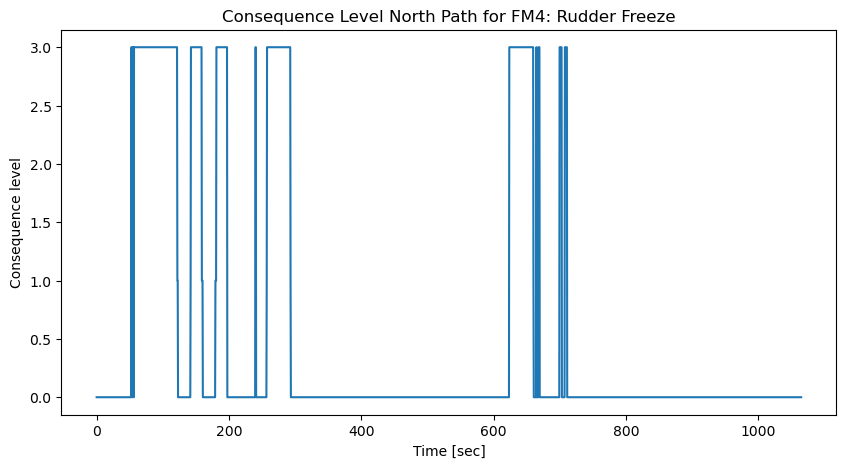

In [7]:
failure = failure_modes[3]
timing = np.arange(0, 0.5 * len(consequence_for_each_timestep_dict[failure]) , 0.5)


int_fig, int_ax = plt.subplots()
plt.xlabel("Time [sec]")
plt.ylabel("Consequence level")
plt.title("Consequence Level "+route+" Path for "+failure)
int_ax.plot(timing,consequence_for_each_timestep_dict[failure])

int_fig.set_figheight(5)
int_fig.set_figwidth(10)

In [8]:
int_fig.savefig('consequence_level_'+failure+route+'.png',bbox_inches='tight')

In [219]:
timing = np.arange(0, 0.5 * len(consequence_for_each_timestep_dict[failure]) , 0.5)



int_fig, int_ax = plt.subplots(2,2)
failureNr = 0
int_fig.suptitle('Consequence Levels for '+route+" Path")
for i in range(2):
    for j in range(2):
        int_ax[i,j].set_title("hehe")
        int_ax[i,j].set_ylabel("Consequence Level")
        int_ax[i,j].plot(timing,consequence_for_each_timestep_dict[failure_modes[failureNr]])
        if failureNr>1:
            int_ax[i,j].set_xlabel("Time [sec]")
        failureNr += 1

        
    #plt.xlabel("Time step")
    #plt.ylabel("Consequence level")
    #plt.title("Consequence Level "+route+" Route for "+failure)

int_fig.set_figheight(7)
int_fig.set_figwidth(12)

NameError: name 'failure_modes' is not defined

In [10]:
int_fig.savefig('all_consequence_level_separated_'+route+'.png',bbox_inches='tight')

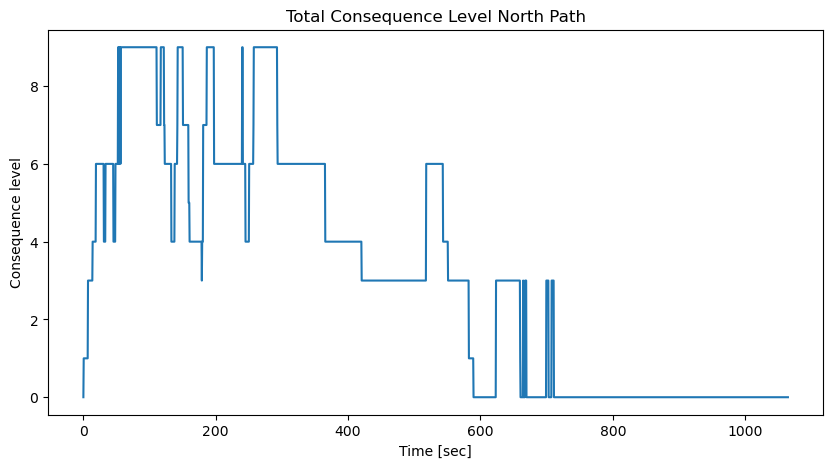

In [11]:
timing = np.arange(0, 0.5 * len(consequence_for_each_timestep_dict[failure_modes[0]]) , 0.5)

consequence_for_each_timestep_dict['total'] = []

for i in range(len(consequence_for_each_timestep_dict[failure_modes[0]])):
    total_consequence = 0
    for j in range(4):
        total_consequence += consequence_for_each_timestep_dict[failure_modes[j]][i]
    consequence_for_each_timestep_dict['total'].append(total_consequence)

int_fig, int_ax = plt.subplots()
plt.xlabel("Time [sec]")
plt.ylabel("Consequence level")
plt.title("Total Consequence Level "+route+" Path")
int_ax.plot(timing,consequence_for_each_timestep_dict['total'])

int_fig.set_figheight(5)
int_fig.set_figwidth(10)


plt.show()

In [12]:
int_fig.savefig('total_consequence_level_'+route+'.png',bbox_inches='tight')

Total risk for all timesteps: 0.00014518399999999764
6.816150234741674e-08


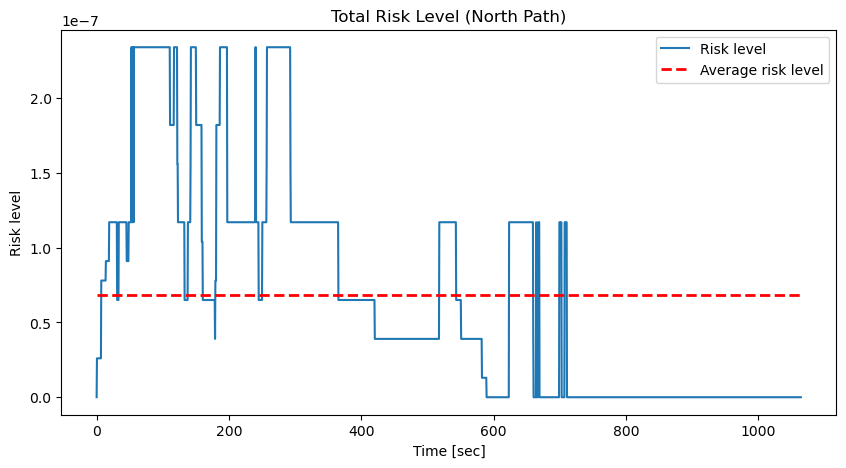

In [13]:
failure = failure_modes[3]
timing = np.arange(0, 0.5 * len(consequence_for_each_timestep_dict[failure_modes[0]]) , 0.5)

probabilities = [1.3*10**(-8), 2.6*10**(-8), 3.9*10**(-8), 3.9*10**(-8)]

consequence_for_each_timestep_dict['total_risk'] = []
sum_risk_all_timesteps = 0

for i in range(len(consequence_for_each_timestep_dict[failure_modes[0]])):
    total_risk = 0
    for j in range(4):
        total_risk += consequence_for_each_timestep_dict[failure_modes[j]][i]*probabilities[j]
    
    sum_risk_all_timesteps+=total_risk
    consequence_for_each_timestep_dict['total_risk'].append(total_risk)

    
print("Total risk for all timesteps:", sum_risk_all_timesteps)
average = sum_risk_all_timesteps/len(consequence_for_each_timestep_dict[failure_modes[0]])
print(average)
    
int_fig, int_ax = plt.subplots()
plt.xlabel("Time [sec]")
plt.ylabel("Risk level")
plt.title("Total Risk Level ("+route+" Path)")
int_ax.plot(timing,consequence_for_each_timestep_dict['total_risk'], label='Risk level')
int_ax.hlines(y=average, xmin=0, xmax=0.5*len(consequence_for_each_timestep_dict[failure_modes[0]]), linewidth=2, linestyles='--', color='r', label='Average risk level')

int_fig.set_figheight(5)
int_fig.set_figwidth(10)
int_ax.legend(loc="upper right")


plt.show()

In [14]:
int_fig.savefig('total_risk_level_'+route+'.png',bbox_inches='tight')

In [15]:
failure = failure_modes[0]
starting_time_of_groundings[failure]

[19.0,
 19.5,
 20.0,
 20.5,
 21.0,
 21.5,
 22.0,
 22.5,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 25.5,
 26.0,
 26.5,
 27.0,
 27.5,
 28.0,
 28.5,
 29.0,
 29.5,
 30.0,
 30.5,
 31.0,
 31.5,
 32.0,
 32.5,
 33.0,
 33.5,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 37.5,
 38.0,
 38.5,
 39.0,
 39.5,
 40.0,
 40.5,
 41.0,
 41.5,
 42.0,
 42.5,
 43.0,
 43.5,
 44.0,
 44.5,
 45.0,
 48.5,
 49.0,
 49.5,
 50.0,
 50.5,
 51.0,
 51.5,
 52.0,
 52.5,
 53.0,
 53.5,
 54.0,
 54.5,
 55.0,
 55.5,
 56.0,
 56.5,
 57.0,
 57.5,
 58.0,
 58.5,
 59.0,
 59.5,
 60.0,
 60.5,
 61.0,
 61.5,
 62.0,
 62.5,
 63.0,
 63.5,
 64.0,
 64.5,
 65.0,
 65.5,
 66.0,
 66.5,
 67.0,
 67.5,
 68.0,
 68.5,
 69.0,
 69.5,
 70.0,
 70.5,
 71.0,
 71.5,
 72.0,
 72.5,
 73.0,
 73.5,
 74.0,
 74.5,
 75.0,
 75.5,
 76.0,
 76.5,
 77.0,
 77.5,
 78.0,
 78.5,
 79.0,
 79.5,
 80.0,
 80.5,
 81.0,
 81.5,
 82.0,
 82.5,
 83.0,
 83.5,
 84.0,
 84.5,
 85.0,
 85.5,
 86.0,
 86.5,
 87.0,
 87.5,
 88.0,
 88.5,
 89.0,
 89.5,
 90.0,
 90.5,
 91.0,
 91.5,
 92.0,
 92.5,
 93.0,

In [16]:
failure_separated_dict[failure_modes[0]]['listOfDicts']

[{'failure_mode': 'FM1: Full Blackout',
  'starting_time': 14.0,
  'worst_violation': 'did_violate_safety_margin',
  'ending_time': 614.0},
 {'failure_mode': 'FM1: Full Blackout',
  'starting_time': 14.5,
  'worst_violation': 'did_violate_safety_margin',
  'ending_time': 614.5},
 {'failure_mode': 'FM1: Full Blackout',
  'starting_time': 15.0,
  'worst_violation': 'did_violate_safety_margin',
  'ending_time': 615.0},
 {'failure_mode': 'FM1: Full Blackout',
  'starting_time': 15.5,
  'worst_violation': 'did_violate_safety_margin',
  'ending_time': 615.5},
 {'failure_mode': 'FM1: Full Blackout',
  'starting_time': 16.0,
  'worst_violation': 'did_violate_safety_margin',
  'ending_time': 616.0},
 {'failure_mode': 'FM1: Full Blackout',
  'starting_time': 16.5,
  'worst_violation': 'did_violate_safety_margin',
  'ending_time': 616.5},
 {'failure_mode': 'FM1: Full Blackout',
  'starting_time': 17.0,
  'worst_violation': 'did_violate_safety_margin',
  'ending_time': 617.0},
 {'failure_mode': 'F

281.5


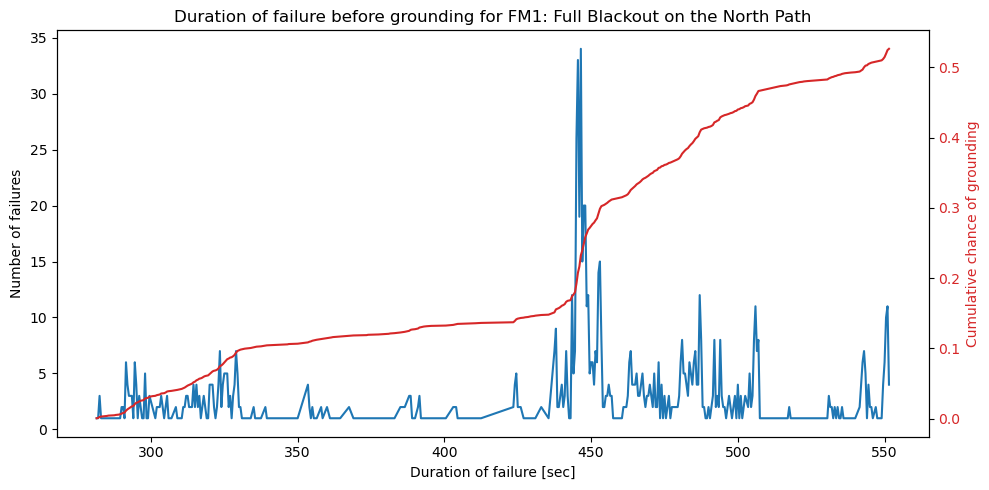

In [17]:
# Showing at what time the vessel needs to recover
timing_list = []
count_list = []
total_simulations = len(loaded_dict)/4

count_list2 = []

failure = failure_modes[0]
total_count = 0

for time, count in failure_separated_dict[failure]['timings'].items():
    
    if time != numberOfSecondsSimulated:
        timing_list.append(time)
        count_list.append(count)
        total_count += count
        count_list2.append(total_count/total_simulations)

        
print(timing_list[0])

        
int_fig, int_ax = plt.subplots()
plt.xlabel("Duration of failure [sec]")
plt.ylabel("Number of failures")
plt.title("Duration of failure before grounding for "+failure+" on the "+route+" Path")

int_fig.set_figheight(5)
int_fig.set_figwidth(10)

int_ax.plot(timing_list, count_list)
ax2 = int_ax.twinx()

color = 'tab:red'
ax2.set_ylabel('Cumulative chance of grounding', color=color)  # we already handled the x-label with ax1
ax2.plot(timing_list, count_list2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

int_fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [18]:
len(time_before_crash_dict[failure_modes[0]])

1151

In [19]:
int_fig.savefig('combined_duration_of_failure_'+failure+'.png',bbox_inches='tight')

1121


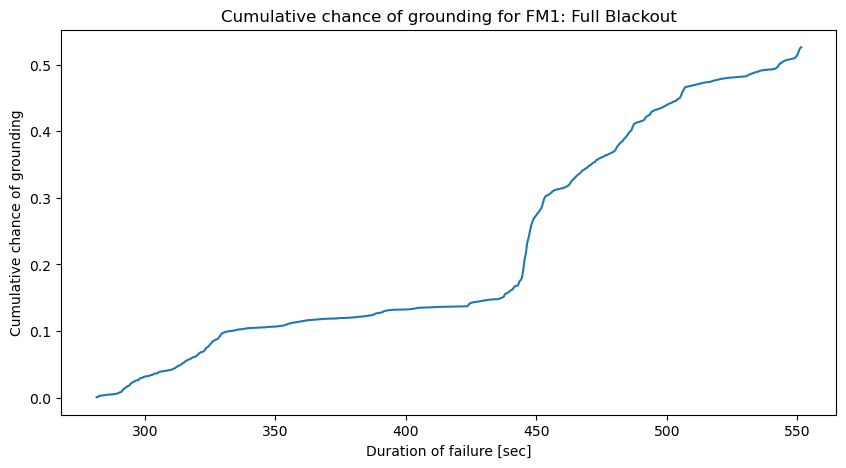

In [20]:
#CUMULATIVE PROB OF GROUNDING
timing_list = []
count_list = []
total_simulations = len(loaded_dict)/4
total_count = 0

failure = failure_modes[0]


for time, count in failure_separated_dict[failure]['timings'].items():
    if time != numberOfSecondsSimulated:
        timing_list.append(time)
        total_count += count
        count_list.append(total_count/total_simulations)
print(total_count)


int_fig, int_ax = plt.subplots()
plt.xlabel("Duration of failure [sec]")
plt.ylabel("Cumulative chance of grounding")
plt.title("Cumulative chance of grounding for "+failure)

int_fig.set_figheight(5)
int_fig.set_figwidth(10)

int_ax.plot(timing_list, count_list)

In [21]:
int_fig.savefig('cumulative_prob_grounding_'+failure+'.png',bbox_inches='tight')

In [22]:
len(failure_separated_dict[failure_modes[0]])

2

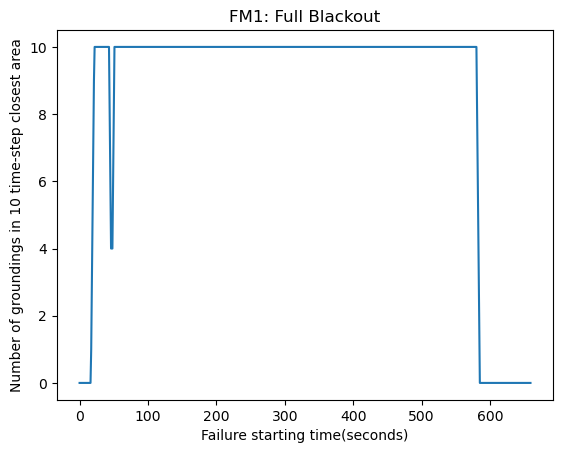

In [23]:
#IKKE SÅ NYTTIG.. PRUKER HELLER CONSEQUENCE LEVEL ANALYSIS!
failure = failure_modes[0]
total_simulation_time = 660

timing = [0] * total_simulation_time

#DENNE TAR MEST SANNSYNLIG OGSÅ MED SAFETY MARGIN VIOLATION!

for i in range(total_simulation_time):
    for j in [float(k) / 2 for k in range(max(0,2*i-5),min(total_simulation_time*2,2*i+5),1)]:
        if j in starting_time_of_groundings[failure]:
            timing[i] += 1    
int_fig, int_ax = plt.subplots()
plt.xlabel("Failure starting time(seconds)")
plt.ylabel("Number of groundings in 10 time-step closest area")
plt.title(failure)
int_ax.plot(timing)

In [24]:
int_fig.savefig('dangerous_area_FM17.png')

In [25]:
starting_time_of_groundings

{'FM1: Full Blackout': [19.0,
  19.5,
  20.0,
  20.5,
  21.0,
  21.5,
  22.0,
  22.5,
  23.0,
  23.5,
  24.0,
  24.5,
  25.0,
  25.5,
  26.0,
  26.5,
  27.0,
  27.5,
  28.0,
  28.5,
  29.0,
  29.5,
  30.0,
  30.5,
  31.0,
  31.5,
  32.0,
  32.5,
  33.0,
  33.5,
  34.0,
  34.5,
  35.0,
  35.5,
  36.0,
  36.5,
  37.0,
  37.5,
  38.0,
  38.5,
  39.0,
  39.5,
  40.0,
  40.5,
  41.0,
  41.5,
  42.0,
  42.5,
  43.0,
  43.5,
  44.0,
  44.5,
  45.0,
  48.5,
  49.0,
  49.5,
  50.0,
  50.5,
  51.0,
  51.5,
  52.0,
  52.5,
  53.0,
  53.5,
  54.0,
  54.5,
  55.0,
  55.5,
  56.0,
  56.5,
  57.0,
  57.5,
  58.0,
  58.5,
  59.0,
  59.5,
  60.0,
  60.5,
  61.0,
  61.5,
  62.0,
  62.5,
  63.0,
  63.5,
  64.0,
  64.5,
  65.0,
  65.5,
  66.0,
  66.5,
  67.0,
  67.5,
  68.0,
  68.5,
  69.0,
  69.5,
  70.0,
  70.5,
  71.0,
  71.5,
  72.0,
  72.5,
  73.0,
  73.5,
  74.0,
  74.5,
  75.0,
  75.5,
  76.0,
  76.5,
  77.0,
  77.5,
  78.0,
  78.5,
  79.0,
  79.5,
  80.0,
  80.5,
  81.0,
  81.5,
  82.0,
  82.5,
  

In [26]:
#print(ship_model.consequence_dicts)
total_consequence = 0
for element in loaded_dict:
    for key, value in element.items():
        if key=='worst_violation' and value=='did_crash':
            total_consequence += 3
        elif key=='worst_violation' and value=='did_violate_safety_margin':
            total_consequence += 1
print(total_consequence)

6724


In [27]:
count_crash = 0
count_safety_margin = 0
for element in loaded_dict:
    if element['failure_mode'] == 'FM4: Rudder Freeze':        
        if element['worst_violation']=='did_crash':
            count_crash += 1
        elif element['worst_violation']=='did_violate_safety_margin':
            count_safety_margin += 1
print("nu of crashes:", count_crash)
print("nu of safety margin: ",count_safety_margin)
print("total failure simulations: 8480")

nu of crashes: 367
nu of safety margin:  12
total failure simulations: 8480
